# **Assignment 10**
DATA602 \
Michael Ippolito

In [181]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
from matplotlib import pyplot as plt


In [182]:
%%HTML
<!-- Set dataframe style -->
<style>.dataframe th{
background:#3f577c; 
font-family:monospace; 
color:white; 
border:3px solid white; 
text-align:left !important;}
</style>

In [183]:
# Load datasets here once and assign to variables iris and boston

# Load iris data
iris = ds.load_iris()

# Load boston data
boston = ds.load_boston()


c:\program files\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [184]:
# Create iris dataframe
iris_X = pd.DataFrame(iris['data'])
iris_y = iris['target']
iris_X.columns = iris['feature_names']
print("Iris features:")
display(iris_X.head())
print()
print("Iris target names:")
print(iris['target_names'])


Iris features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Iris target names:
['setosa' 'versicolor' 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [185]:
# Fit to k=5 nearest neighbors
knn = KNN(n_neighbors=5)
knn.fit(iris_X, iris_y)

# Predict new observations
new_observations = knn.predict(iris_X)
print("New observations:")
print(iris['target_names'][new_observations])


New observations:
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [186]:
# Set function parameters
split = 0.3
k = 5

# Split the data into train and test
(X_train, X_test, y_train, y_test) = tts(iris_X, iris_y, test_size=split, random_state=777)

# Fit the KNN model
knn = KNN(n_neighbors = k)
knn.fit(X_train, y_train)

# Generate score
knn_score = knn.score(X_test, y_test)
print('Accuracy:', knn_score)


Accuracy: 0.9777777777777777


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

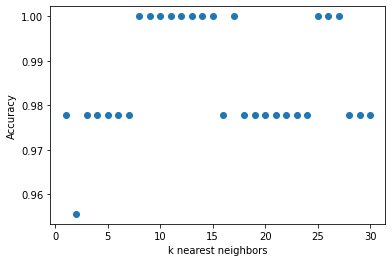

In [187]:
# Set split rate for test/training data
split = 0.3

# Initialize dataframe to store accuracy scores for each model run
dfscores = pd.DataFrame(columns=['k', 'accuracy'])

# Iterate over range of k values
for k in range(1, 31):

    # Split the data into train and test
    (X_train, X_test, y_train, y_test) = tts(iris_X, iris_y, test_size=split, random_state=777)

    # Fit the KNN model
    knn = KNN(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Generate score
    knn_score = knn.score(X_test, y_test)
    #print('Accuracy (k=' + str(k) + '):' + str(knn_score))
    dfnew = pd.DataFrame({'k': k, 'accuracy': knn_score}, columns=dfscores.columns, index=[k])
    dfscores = pd.concat([dfscores, dfnew], axis=0)

# Plot
plt.scatter(data=dfscores, x='k', y='accuracy')
plt.xlabel('k nearest neighbors')
plt.ylabel('Accuracy')
plt.show()


**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [188]:
# Load boston data into dataframes
boston_X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_y = pd.DataFrame(boston['target'], columns=['MEDV'])

# Print select averages
print('Average age:', np.mean(boston_X['AGE']))
print('Average median home value:', np.median(boston_y['MEDV']))
print()

# Print target values
print('Target values:')
boston_y_arr = np.array(boston_y)
print(boston_y_arr)

Average age: 68.57490118577076
Average median home value: 21.2

Target values:
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

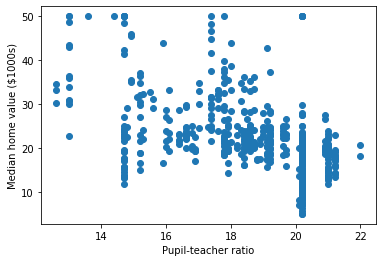

[15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 15.2 15.2 15.2 21.
 21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.
 21.  21.  21.  21.  21.  21.  21.  19.2 19.2 19.2 19.2 18.3 18.3 17.9
 17.9 17.9 17.9 17.9 17.9 17.9 17.9 17.9 16.8 16.8 16.8 16.8 21.1 17.9
 17.3 15.1 19.7 19.7 19.7 19.7 19.7 19.7 18.6 16.1 16.1 18.9 18.9 18.9
 19.2 19.2 19.2 19.2 18.7 18.7 18.7 18.7 18.7 18.7 19.  19.  19.  19.
 18.5 18.5 18.5 18.5 17.8 17.8 17.8 17.8 18.2 18.2 18.2 18.  18.  18.
 18.  18.  20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 17.8
 17.8 17.8 17.8 17.8 17.8 17.8 17.8 17.8 19.1 19.1 19.1 19.1 19.1 19.1
 19.1 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2
 21.2 21.2 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7
 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7
 14.7 14.7 14.7 14.7 16.6 16.6 16.6 16.6 16.6 16.6 16.6 17.8 17.8 17.8
 17.8 17.8 17.8 17.8 17.8 15.2 15.2 15.2 15.2 15.2 15.2 15.6 15.6 14.4
 12.6 12.6

In [189]:
# Plot MEDV vs PTRATIO
plt.scatter(x=boston_X['PTRATIO'], y=boston_y['MEDV'])
plt.xlabel('Pupil-teacher ratio')
plt.ylabel('Median home value ($1000s)')
plt.show()

# Print PTRATIO as numpy array
boston_X_arr = np.array(boston_X['PTRATIO'])
print(boston_X_arr)

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

Prediction space (x): [[12.6       ]
 [12.79183673]
 [12.98367347]
 [13.1755102 ]
 [13.36734694]
 [13.55918367]
 [13.75102041]
 [13.94285714]
 [14.13469388]
 [14.32653061]
 [14.51836735]
 [14.71020408]
 [14.90204082]
 [15.09387755]
 [15.28571429]
 [15.47755102]
 [15.66938776]
 [15.86122449]
 [16.05306122]
 [16.24489796]
 [16.43673469]
 [16.62857143]
 [16.82040816]
 [17.0122449 ]
 [17.20408163]
 [17.39591837]
 [17.5877551 ]
 [17.77959184]
 [17.97142857]
 [18.16326531]
 [18.35510204]
 [18.54693878]
 [18.73877551]
 [18.93061224]
 [19.12244898]
 [19.31428571]
 [19.50612245]
 [19.69795918]
 [19.88979592]
 [20.08163265]
 [20.27346939]
 [20.46530612]
 [20.65714286]
 [20.84897959]
 [21.04081633]
 [21.23265306]
 [21.4244898 ]
 [21.61632653]
 [21.80816327]
 [22.        ]]

Predicted values (y): [[35.16421874]
 [34.75039328]
 [34.33656781]
 [33.92274235]
 [33.50891688]
 [33.09509142]
 [32.68126595]
 [32.26744049]
 [31.85361502]
 [31.43978956]
 [31.02596409]
 [30.61213863]
 [30.19831316]
 [29.7844

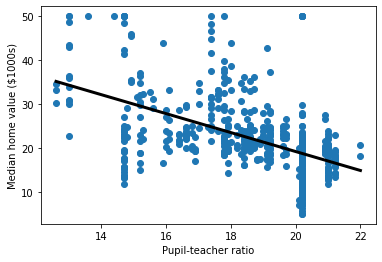

In [190]:
# Fit linear model to data
linreg = lm.LinearRegression()
linreg.fit(boston_X_arr.reshape(-1, 1), boston_y_arr.reshape(-1, 1))

# Create prediction space x
x_test = np.linspace(np.min(boston_X_arr), np.max(boston_X_arr)).reshape(-1, 1)

# Predict y values
y_pred = linreg.predict(x_test)

# Print x and y
print("Prediction space (x):", x_test)
print()
print("Predicted values (y):", y_pred)
print()

# Plot x,y data along with regression line
plt.scatter(boston_X_arr, boston_y_arr)
plt.plot(x_test, y_pred, color='black', linewidth=3)
plt.xlabel('Pupil-teacher ratio')
plt.ylabel('Median home value ($1000s)')
plt.show()
